Found 190 files


/var/folders/b5/cbnlm0vn1j54xy3c75jt4gwc0000gn/T/ipykernel_20886/828753100.py:50: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "v-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(distance_stab, sim_times_stab, "v-", label="STAB-GPU", linestyle="-", color="red", markersize=5)
/var/folders/b5/cbnlm0vn1j54xy3c75jt4gwc0000gn/T/ipykernel_20886/828753100.py:51: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string ">-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(distance_stim, sim_times_stim, ">-", label="Stim", linestyle="--", color="green", markersize=5)
/var/folders/b5/cbnlm0vn1j54xy3c75jt4gwc0000gn/T/ipykernel_20886/828753100.py:53: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "<-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(distance_qiskit, sim_

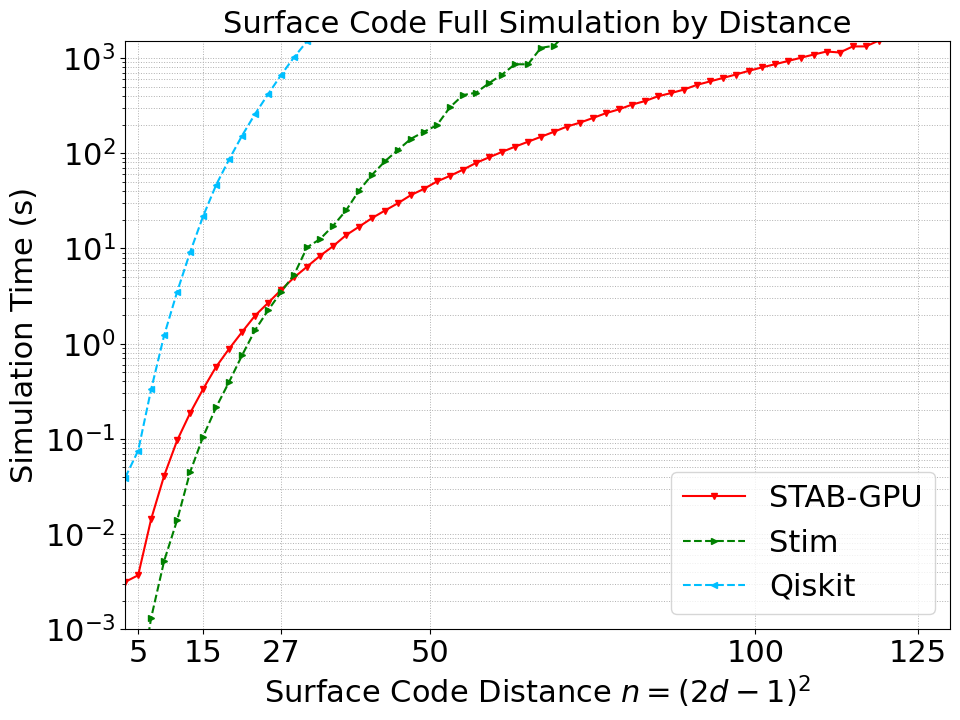

In [32]:
import os
import numpy as np
import matplotlib.pyplot as plt

def read_and_label_file(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()
    
    labels = ["sim_name", "sim_time", "distance", "rounds", "n_qubits"]
    data = {labels[i]: lines[i].strip() if i == 0 else float(lines[i]) for i in range(len(lines))}
    
    return data

def process_folder(folder_path):
    all_data = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"): 
            filepath = os.path.join(folder_path, filename)
            data = read_and_label_file(filepath)
            all_data.append(data)
    
    return sorted(all_data, key=lambda x: x["distance"])  # Sort by sim_time

def plot_data(all_data):
    sim_times_stab = []
    sim_times_stim = []
    distance_stab = []
    distance_stim = []
    sim_times_cpu = []
    distance_cpu = []
    sim_times_qiskit= []
    distance_qiskit = []

    for data in all_data:
        if data["sim_name"] == "nvgpu":
            distance_stab.append(float(data["distance"]))
            sim_times_stab.append(float(data["sim_time"]))
        elif data["sim_name"] == "stim":
            distance_stim.append(float(data["distance"]))
            sim_times_stim.append(float(data["sim_time"]))
        elif data["sim_name"] == "cpu":
            distance_cpu.append(float(data["distance"]))
            sim_times_cpu.append(float(data["sim_time"]))
        elif data["sim_name"] == "qiskit":
            distance_qiskit.append(float(data["distance"]))
            sim_times_qiskit.append(float(data["sim_time"]))

    plt.figure(figsize=(10, 7))
    plt.plot(distance_stab, sim_times_stab, "v-", label="STAB-GPU", linestyle="-", color="red", markersize=5)
    plt.plot(distance_stim, sim_times_stim, ">-", label="Stim", linestyle="--", color="green", markersize=5)
    # plt.plot(distance_cpu, sim_times_cpu, "^-", label="STAB-CPU", linestyle="-", color="orange", markersize=5)
    plt.plot(distance_qiskit, sim_times_qiskit, "<-", label="Qiskit", linestyle="--", color="deepskyblue", markersize=5)

    # Increase font size for axis labels and title
    plt.xlabel(r"Surface Code Distance $n=(2d-1)^2$", fontsize=22)
    plt.ylabel("Simulation Time (s)", fontsize=22)
    plt.title("Surface Code Full Simulation by Distance", fontsize=22)
    
    # Increase font size for ticks
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)

    # Set the x-axis to log2 scale
    plt.ylim(.001, 1500)
    plt.xlim(3, 130)
    plt.yscale("log", base=10)
    
    # Only show the x-axis ticks for 5, 15, 51, and 99 on the log2 scale
    plt.xticks([5, 15, 27, 50, 100, 125], labels=[str(x) for x in [5, 15, 27, 50, 100, 125]])

    # Increase font size for the legend
    plt.legend(fontsize=22)

    plt.grid(True, linestyle=":", linewidth=0.7, which="both")

    # Adjust layout to cut off some whitespace
    plt.subplots_adjust(top=0.95, right=0.95)

    # Save the plot as a PDF
    plt.savefig("graphics/fowler_surface_code.pdf", format="pdf")

    plt.show()

folder_path = "fowler_surface_code"  
all_data = process_folder(folder_path)

print(f"Found {len(all_data)} files")

if not all_data:
    print("No data found.")

plot_data(all_data)


Found 235 files


/var/folders/b5/cbnlm0vn1j54xy3c75jt4gwc0000gn/T/ipykernel_20886/3714183229.py:16: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "bs--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(sim_times_stab, qubits_stab, "bs--", label="Stab-GPU(1D, no parse)", linestyle="-", markersize=5)
/var/folders/b5/cbnlm0vn1j54xy3c75jt4gwc0000gn/T/ipykernel_20886/3714183229.py:17: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "g^-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(sim_times_stim, qubits_stim, "g^-", label="Stim (no parse)", linestyle="--", markersize=5)


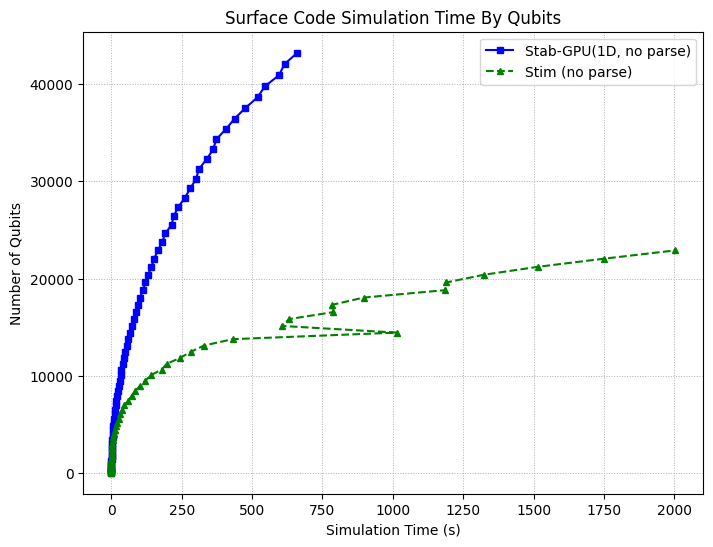

In [27]:
def plot_qubits_vs_time(all_data):
    sim_times_stab = []
    sim_times_stim = []
    qubits_stab = []
    qubits_stim = []

    for data in all_data:
        if data["sim_name"] == "stab":
            qubits_stab.append(float(data["n_qubits"]))
            sim_times_stab.append(float(data["sim_time"]))
        elif data["sim_name"] == "stim":
            qubits_stim.append(float(data["n_qubits"]))
            sim_times_stim.append(float(data["sim_time"]))

    plt.figure(figsize=(8, 6))
    plt.plot(sim_times_stab, qubits_stab, "bs--", label="Stab-GPU(1D, no parse)", linestyle="-", markersize=5)
    plt.plot(sim_times_stim, qubits_stim, "g^-", label="Stim (no parse)", linestyle="--", markersize=5)

    plt.ylabel("Number of Qubits")
    plt.xlabel("Simulation Time (s)")
    plt.title("Surface Code Simulation Time By Qubits")
    plt.legend()
    plt.grid(True, linestyle=":", linewidth=0.7, which="both")
    plt.show()

folder_path = "surface_code_data"  
all_data = process_folder(folder_path)

print(f"Found {len(all_data)} files")

if not all_data:
    print("No data found.")

plot_qubits_vs_time(all_data)
